In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [4]:
ri.set_fft_gain(4)

In [5]:
ri.set_lo(1000.)

In [6]:
ri.set_tone_freqs(np.array([945.1]),2**16)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 945.1015625])

In [7]:
ri.set_dac_atten(20)

In [8]:
d,addr = ri.get_data(2)

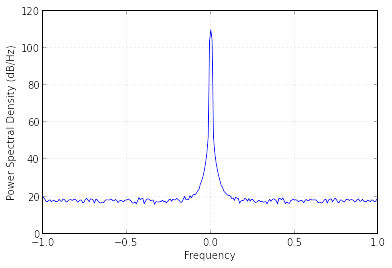

In [9]:
blah = psd(d[:,0])

In [10]:
import time

In [11]:
epoch = []
data = []

In [12]:
while True:
    epoch.append(time.time())
    d,addr = ri.get_data(2)
    data.append(d)
    print len(data),d.mean()
    time.sleep(60)
    

1 (33235.1+3113.43j)
2 (33235.5+3105.89j)
3 (33235.7+3102.47j)
4 (33236+3097.43j)
5 (33236.2+3093.96j)
6 (33236.8+3083.45j)
7 (33237+3081.1j)
8 (33237.5+3072.54j)
9 (33237.4+3074.71j)
10 (33237.2+3077.52j)
11 (33237.5+3072.19j)
12 (33237.5+3072.38j)
13 (33237.8+3066.55j)
14 (33237.8+3066.42j)
15 (33237.4+3073.96j)
16 (33237.2+3076.83j)
17 (33237.1+3078.62j)
18 (33236.9+3082.41j)
19 (33236.6+3088.45j)
20 (33236.6+3087.89j)
21 (33236.7+3085.82j)
22 (33236.8+3083.6j)
23 (33236.7+3085.51j)
24 (33236.7+3086.12j)
25 (33236.7+3085.94j)
26 (33236.5+3088.65j)
27 (33236.7+3085.5j)
28 (33236.7+3085.43j)
29 (33236.6+3087.9j)
30 (33236.5+3088.78j)
31 (33236.9+3082.59j)
32 (33237.6+3069.7j)
33 (33237.8+3067.29j)
34 (33238+3062.96j)
35 (33237.6+3069.85j)
36 (33238.1+3061.02j)
37 (33238.2+3059.75j)
38 (33238.3+3058.79j)
39 (33238.5+3055.27j)
40 (33238.2+3059.14j)
41 (33238.5+3054.39j)
42 (33238.8+3050.09j)
43 (33239.3+3041.7j)
44 (33239.3+3041.1j)
45 (33239.6+3035.69j)
46 (33239.7+3033.78j)
47 (33240+

KeyboardInterrupt: 

In [13]:
dmag = np.array([np.abs(d).mean() for d in data])
t = np.array(epoch)
t = t-t.min()

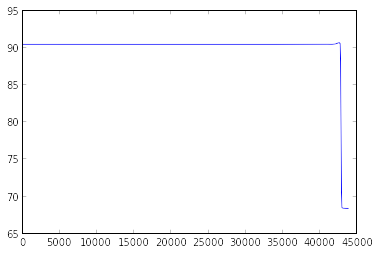

In [14]:
plot(t,20*np.log10(dmag))

In [15]:
import kid_readout.utils.hpd_temps
reload(kid_readout.utils.hpd_temps)

<module 'kid_readout.utils.hpd_temps' from '/home/gjones/readout/kid_readout/kid_readout/utils/hpd_temps.pyc'>

In [16]:
package_temperature,_,load_temperature,_blah = kid_readout.utils.hpd_temps.get_temperatures_at(np.array(epoch))

log file is: /home/data/adc_mount/garbage_cooldown_logs/2015-07-01_08-39-53.nc, last requested time is Sat Jul  4 11:53:58 2015


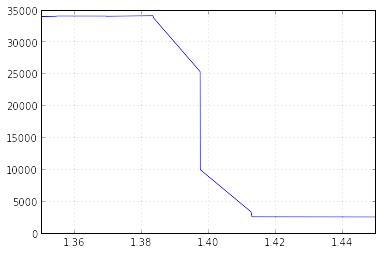

In [20]:
plot(package_temperature,dmag)
xlim(1.35,1.45)
grid()

In [29]:
np.savez('/data/detectors/2015-07-04-StarCryo-nevins-tc-measure.npz',package_temperature=package_temperature,
        dmag = dmag, freq=945)

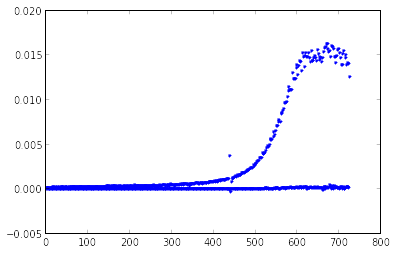

In [22]:
plot(np.diff(package_temperature),'.')

In [24]:
t,pkg,load = kid_readout.utils.hpd_temps._filecache['/home/data/adc_mount/garbage_cooldown_logs/2015-07-01_08-39-53.nc']

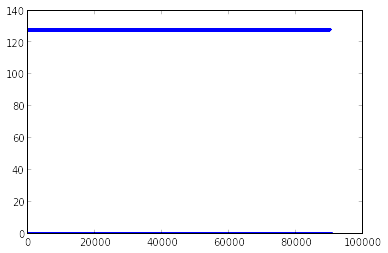

In [27]:
plot( np.diff (t),'.')

In [28]:
t.dtype

dtype('float32')